In [1]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt # data visualization
import seaborn as sns

In [2]:
cate2cnt = {}
with open('../../data/book_data/book_cate_map.txt', 'r') as f:
    for line in f:
        conts = line.strip().split(',')
        cate2cnt[int(conts[-2])-1] = int(conts[-1])
cate2cnt[0] = 367982-231427+2973
        
item2cate = {}
with open('../../data/book_data/book_item_cate.txt', 'r') as f:
    for line in f:
        conts = line.strip().split(',')
        item2cate[int(conts[0])] = int(conts[1])-1

max_cate_id = 590        

In [3]:
exp_name = 'default_2'

info_path = './info/' + exp_name + '_info.txt'
intere_cate_cnt = np.zeros([400,max_cate_id], dtype=float)
intere_set = set()

with open(info_path, 'r') as f:
    for line in f:
        conts = line.strip().split(',')
        user = conts[0]
        intere = int(conts[1])     
        intere_set.add(intere)
        for i in range(2,52):
            item = int(conts[i])
            if item in item2cate:
                cate = item2cate[item]
            else:
                cate = 0
            intere_cate_cnt[intere][cate] += 1

In [4]:
intere_list = list(intere_set)
intere_num = len(intere_list)
print('intere_num : {}'.format(intere_num))

intere_num : 22


In [5]:
intere_list

[0,
 5,
 6,
 9,
 10,
 11,
 140,
 16,
 22,
 283,
 47,
 48,
 49,
 55,
 65,
 335,
 80,
 216,
 224,
 226,
 240,
 113]

In [6]:
intere_cate_p = intere_cate_cnt/np.sum(intere_cate_cnt,axis=0,keepdims=True)

/tmp/ipykernel_24591/2039366209.py:1: RuntimeWarning: invalid value encountered in true_divide
  intere_cate_p = intere_cate_cnt/np.sum(intere_cate_cnt,axis=0,keepdims=True)


In [8]:
np.max(intere_cate_p,axis=0)

array([0.23788693, 0.27292911, 0.2581099 , 0.24723427, 0.25475899,
       0.26620914, 0.23486342, 0.27272727, 0.2521515 , 0.26776233,
       0.25921569, 0.25804168, 0.26479857, 0.24512149, 0.30769231,
       0.24502663, 0.24603462, 0.24711531, 0.24259332, 0.24164274,
       0.24889165, 0.24353776, 0.24272491, 0.24854867, 0.26891616,
       0.23954553, 0.25692179, 0.24089585, 0.23092477, 0.24505144,
       0.26388181, 0.27134623, 0.24353533, 0.25915996, 0.25262763,
       0.24181143, 0.2338403 , 0.24954288, 0.24069117, 0.26792645,
       0.24934243, 0.23887349, 0.2881072 , 0.24614705, 0.24704145,
       0.2658371 , 0.2811115 , 0.26511226, 0.29268293, 0.27339181,
       0.28744939, 0.2671723 , 0.25131942, 0.24290673, 0.26663754,
       0.25434084, 0.34520124, 0.32283465, 0.25216962, 0.340625  ,
       0.25131079, 0.25287356, 0.24855883, 0.25597817, 0.27371795,
       0.24103709, 0.22871425, 0.2838485 , 0.25845945, 0.26119403,
       0.25718194, 0.24138584, 0.28614762, 0.24946876, 0.25961

### 不考虑类别总量

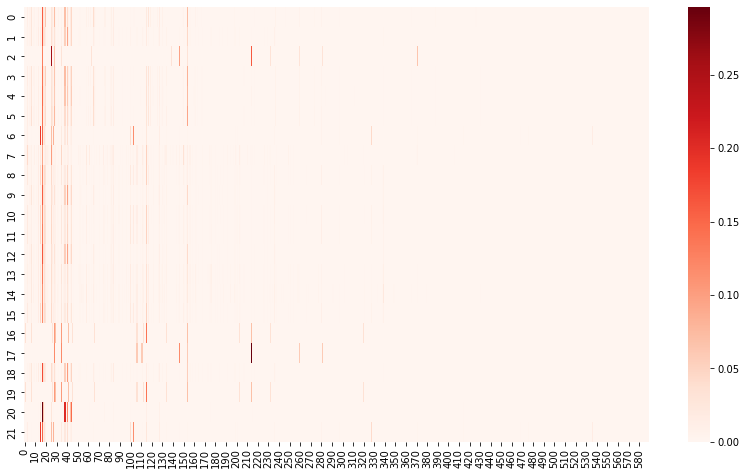

In [6]:
draw_info = intere_cate_cnt[intere_list]
for i in range(intere_num):
    draw_info[i][0]=0
draw_info /= np.sum(draw_info, axis=1, keepdims = True)
max_num = np.max(draw_info)
plt.figure(figsize=(14, 8))# 定义输出图像大小
#annot参数决定是否在热力图上显示数值Vmax,Vmin表示最大最小值，cmap表示颜色
sns.heatmap(draw_info, fmt='.0f', annot=False, vmin=0, vmax=max_num,
            cmap='Reds')#, yticklabels=y_label, xticklabels=x_label)
plt.show()

### 考虑每个类别的总量

In [7]:
draw_info = intere_cate_cnt[intere_list]
for i in range(intere_num):
    draw_info[i][0]=0
for i in range(intere_num):
    for j in range(590):
        draw_info[i][j] /= cate2cnt[j]

In [8]:
draw_info /= np.sum(draw_info, axis=1, keepdims = True)
max_num = np.max(draw_info)

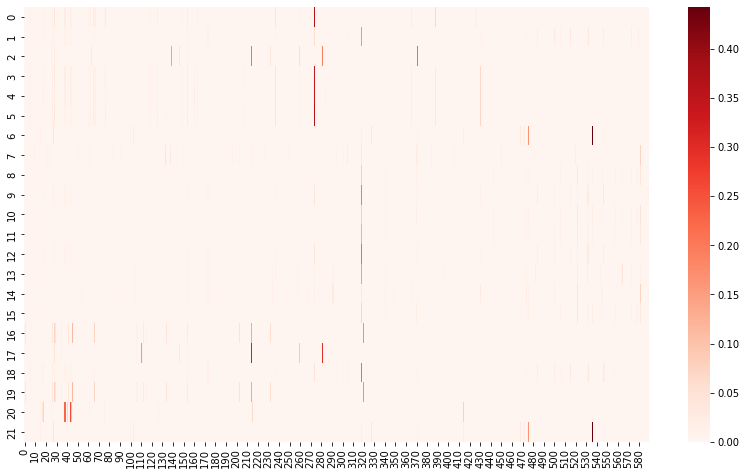

In [10]:
plt.figure(figsize=(14, 8))# 定义输出图像大小
#annot参数决定是否在热力图上显示数值Vmax,Vmin表示最大最小值，cmap表示颜色
sns.heatmap(draw_info, fmt='.0f', annot=False, vmin=0, vmax=max_num,
            cmap='Reds')#, yticklabels=y_label, xticklabels=x_label)
#plt.savefig('./img/{}.png'.format(exp_name))
plt.show()